In [24]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import roc_curve,auc

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [25]:
df=pd.read_csv('../data/haberman_csv.csv')

In [26]:
df.columns

Index(['Age_of_patient_at_time_of_operation', 'Patients_year_of_operation',
       'Number_of_positive_axillary_nodes_detected', 'Survival_status'],
      dtype='object')

In [27]:
df=df.drop(columns=['Patients_year_of_operation'])

In [28]:
df.shape

(306, 3)

In [29]:
df=df.rename(columns={'Age_of_patient_at_time_of_operation':'age', 'Number_of_positive_axillary_nodes_detected':'detections'})

In [30]:
data=df.values
X=data[:,:2]
Y=data[:,2]

In [31]:
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=9)

In [32]:
tree=DecisionTreeClassifier(random_state=9)

tree_params={'max_depth':[3,4,5,6],'max_features':[1,2]}

tree_grid=GridSearchCV(tree,tree_params,scoring='accuracy',n_jobs=-1,cv=10,verbose=2)

tree_grid.fit(X_train,Y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    2.0s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=9,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6], 'max_features': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_

In [33]:
import pydotplus
from sklearn.tree import export_graphviz

def draw_tree(tree,features,location):
    tree_string=export_graphviz(tree,feature_names=features,filled=True,out_file=None)
    graph=pydotplus.graph_from_dot_data(tree_string)
    graph.write_png(location)

In [34]:
draw_tree(tree_grid.best_estimator_,['age', 'detections'],\
          location='../imgs/tree_grid1.png')

<img src='../imgs/tree_grid1.png'>

In [35]:
from sklearn.tree.export import export_text

In [38]:
rules=export_text(tree_grid.best_estimator_,feature_names=['age', 'detections'])

In [39]:
print(rules)

|--- detections <= 4.50
|   |--- age <= 69.50
|   |   |--- age <= 42.50
|   |   |   |--- detections <= 0.50
|   |   |   |   |--- age <= 35.50
|   |   |   |   |   |--- age <= 33.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- age >  33.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- age >  35.50
|   |   |   |   |   |--- age <= 38.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- age >  38.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- detections >  0.50
|   |   |   |   |--- class: 1
|   |   |--- age >  42.50
|   |   |   |--- age <= 43.50
|   |   |   |   |--- detections <= 1.00
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- detections >  1.00
|   |   |   |   |   |--- detections <= 2.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- detections >  2.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- age >  43.50
|   |   |   |   |--- detections <= 0.50
|   |   |   |   |   |--- age <= 50.50
|   |   |   

In [40]:
from collections import Counter

In [41]:
leaves_index=tree_grid.best_estimator_.apply(X_train)

In [42]:
cnt=Counter(leaves_index)

In [43]:
elements=[cnt[x] for x in leaves_index]

In [44]:
elements

[1,
 11,
 40,
 2,
 5,
 12,
 49,
 40,
 5,
 49,
 49,
 12,
 7,
 49,
 40,
 49,
 3,
 11,
 5,
 1,
 40,
 49,
 2,
 1,
 3,
 24,
 49,
 49,
 24,
 40,
 40,
 3,
 17,
 24,
 17,
 24,
 40,
 4,
 49,
 4,
 40,
 49,
 49,
 49,
 17,
 24,
 24,
 12,
 11,
 7,
 24,
 24,
 3,
 12,
 17,
 49,
 24,
 1,
 40,
 7,
 49,
 49,
 3,
 3,
 40,
 1,
 24,
 7,
 11,
 49,
 40,
 1,
 40,
 49,
 4,
 5,
 40,
 40,
 2,
 24,
 24,
 17,
 49,
 17,
 2,
 40,
 24,
 49,
 49,
 49,
 11,
 40,
 7,
 49,
 12,
 49,
 40,
 49,
 49,
 49,
 3,
 49,
 24,
 12,
 49,
 12,
 4,
 5,
 5,
 11,
 40,
 7,
 11,
 3,
 40,
 17,
 40,
 24,
 24,
 24,
 4,
 49,
 2,
 24,
 17,
 17,
 5,
 17,
 49,
 2,
 5,
 40,
 40,
 4,
 3,
 40,
 49,
 49,
 7,
 17,
 1,
 49,
 49,
 49,
 11,
 49,
 40,
 7,
 49,
 7,
 7,
 3,
 40,
 24,
 12,
 17,
 40,
 40,
 40,
 49,
 11,
 49,
 24,
 40,
 17,
 49,
 49,
 24,
 40,
 12,
 12,
 2,
 24,
 49,
 40,
 17,
 49,
 11,
 5,
 4,
 3,
 40,
 4,
 49,
 12,
 40,
 11,
 49,
 40,
 40,
 49,
 3,
 40,
 40,
 40,
 5,
 1,
 40,
 49,
 40,
 24,
 7,
 17,
 49,
 7,
 49,
 1,
 7,
 7,
 2,
 17,
 24,
 

In [45]:
len(elements)

214

In [12]:
tree_grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=9, splitter='best')

In [13]:
tree2=DecisionTreeClassifier(random_state=9)
tree_params2={'max_depth':[2,3],'max_features':[1,2]}

tree_grid2=GridSearchCV(tree2,tree_params2,scoring='accuracy',n_jobs=-1,cv=10,verbose=2)

tree_grid2.fit(X_train,Y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  40 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=9,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 3], 'max_features': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=

In [14]:
draw_tree(tree_grid2.best_estimator_,['age', 'detections'],\
          location='../imgs/tree_grid_2.png')

<img src='../imgs/tree_grid_2.png'>

<img src='../imgs/tree_grid1.png'>

In [18]:
from sklearn.tree import plot_tree

[Text(219.393,213.051,'X[1] <= 4.5\nentropy = 0.391\nsamples = 214\nvalue = [157, 57]'),
 Text(138.509,180.274,'X[0] <= 69.5\nentropy = 0.305\nsamples = 160\nvalue = [130, 30]'),
 Text(74.0122,147.497,'X[0] <= 42.5\nentropy = 0.281\nsamples = 148\nvalue = [123, 25]'),
 Text(42.2927,114.72,'X[1] <= 0.5\nentropy = 0.175\nsamples = 31\nvalue = [28, 3]'),
 Text(33.8341,81.9429,'X[0] <= 35.5\nentropy = 0.266\nsamples = 19\nvalue = [16, 3]'),
 Text(16.9171,49.1657,'X[0] <= 33.5\nentropy = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(8.45854,16.3886,'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(25.3756,16.3886,'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(50.7512,49.1657,'X[0] <= 38.5\nentropy = 0.219\nsamples = 16\nvalue = [14, 2]'),
 Text(42.2927,16.3886,'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(59.2098,16.3886,'entropy = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(50.7512,81.9429,'entropy = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(105.732,114.72,'X[0] <= 43.5\ne

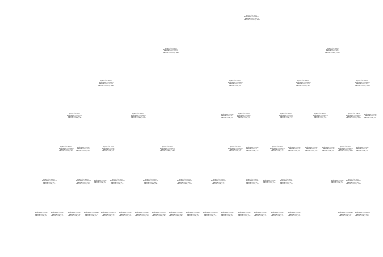

In [23]:
clf=tree_grid.best_estimator_.fit(X_train,Y_train)
plot_tree(clf)